In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from stochastic.processes.diffusion import *


In [3]:
amplitude = 5
center = 7.5
samples_per_bunch = 5_000

NR_OF_JUMPS = 50 #per bunch
                
process = OrnsteinUhlenbeckProcess(speed=5, vol=5)
samples = process.sample(samples_per_bunch)[:samples_per_bunch]
if NR_OF_JUMPS > 0:
    jump = np.repeat(
        np.random.uniform(
            center - amplitude/2, 
            center + amplitude/2, 
            NR_OF_JUMPS
            ), 
        samples_per_bunch/NR_OF_JUMPS
        )
    samples_jump = samples + jump
    
scaled = (samples - np.min(samples))
scaled = amplitude*scaled/np.max(scaled) - amplitude/2 + center

scaled_jump = (samples_jump - np.min(samples_jump))
scaled_jump = amplitude*scaled_jump/np.max(scaled_jump) - amplitude/2 + center

In [4]:
Git_Folder = os.path.dirname(os.path.dirname(os.getcwd()))

In [5]:
np.where(np.diff(jump)!=0)

(array([  99,  199,  299,  399,  499,  599,  699,  799,  899,  999, 1099,
        1199, 1299, 1399, 1499, 1599, 1699, 1799, 1899, 1999, 2099, 2199,
        2299, 2399, 2499, 2599, 2699, 2799, 2899, 2999, 3099, 3199, 3299,
        3399, 3499, 3599, 3699, 3799, 3899, 3999, 4099, 4199, 4299, 4399,
        4499, 4599, 4699, 4799, 4899], dtype=int64),)

In [6]:
# plt.plot(np.linspace(0,1,5000), np.arange(5000))
# np.arange(5000).shape

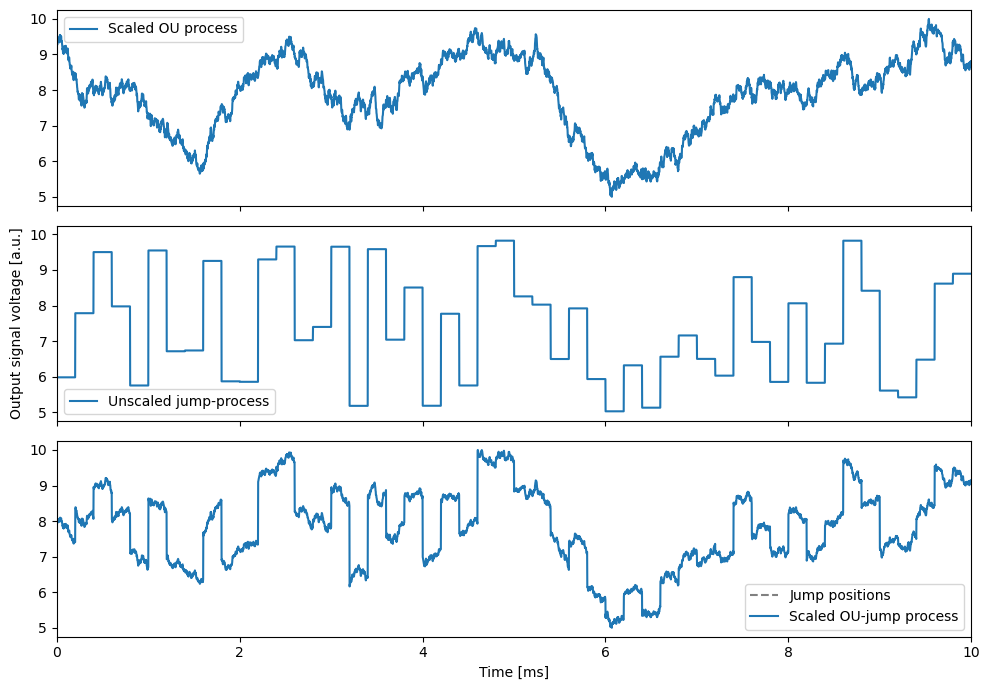

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7), sharey = True, sharex = True)
titles = ["Scaled OU process", "Unscaled jump-process", "Scaled OU-jump process"]

sr, seq_length = 500_000, 5_000
max_x = seq_length/sr*1000

for i, x in enumerate([scaled, jump, scaled_jump]):
    axs[i].plot(np.linspace(0, max_x, 5000), x, label = titles[i], c = "C0") 

for i in np.where(np.diff(jump)!=0)[0]:
    axs[2].axvline(i+1, ymax=(np.min(scaled_jump[i:i+2]-5))/5, alpha = 0.5, ls = "--", c="grey")

from matplotlib.lines import Line2D
axs[0].legend()
axs[1].legend()
axs[2].legend(
    [Line2D([0], [0], color = "grey", ls = "--"), Line2D([0], [0], color = "C0")], 
    ["Jump positions", "Scaled OU-jump process"]
    )
axs[0].set_xlim(0, max_x)
axs[2].set_xlabel("Time [ms]")
axs[1].set_ylabel('Output signal voltage [a.u.]')
# fig.text(0.08, 0.5, 'Output signal voltage [a.u.]', va='center', rotation='vertical')

plt.tight_layout()

plt.savefig(os.path.join(Git_Folder, "67a9c89827d61417b921f8b8", "Figures", "OU-jump.svg"))

In [8]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

<>:5: SyntaxWarning: invalid escape sequence '\L'
<>:5: SyntaxWarning: invalid escape sequence '\L'
<>:5: SyntaxWarning: invalid escape sequence '\L'
<>:5: SyntaxWarning: invalid escape sequence '\L'
C:\Users\lorentsen\AppData\Local\Temp\ipykernel_31344\3994372561.py:5: SyntaxWarning: invalid escape sequence '\L'
  for file in ["\LongOUJump.csv", "\LongOU.csv"]:
C:\Users\lorentsen\AppData\Local\Temp\ipykernel_31344\3994372561.py:5: SyntaxWarning: invalid escape sequence '\L'
  for file in ["\LongOUJump.csv", "\LongOU.csv"]:


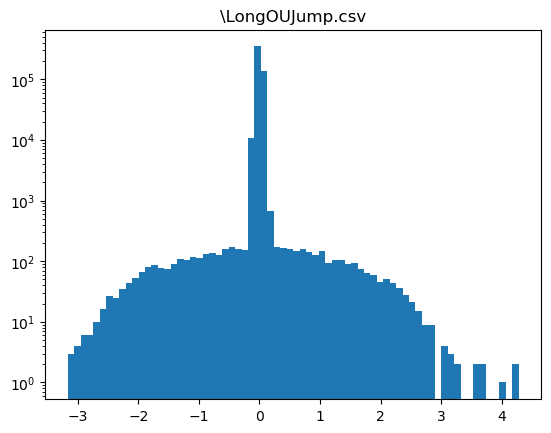

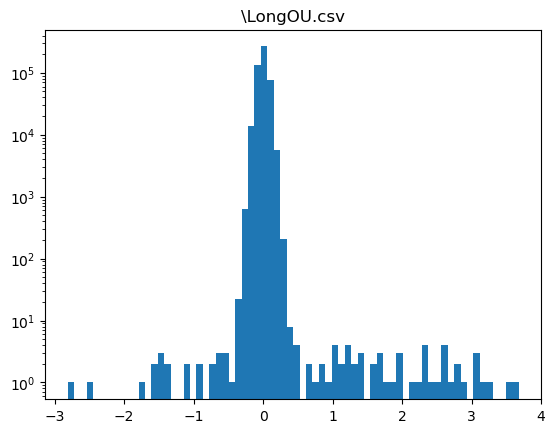

In [ ]:
# plt.plot(template)
for file in ["\LongOUJump.csv", "\LongOU.csv"]:
    template = pd.read_csv(r"\\unicph.domain\groupdir\SCI-NBI-quantop-data\data\gwd\Experimental Data\atoms\2025\2025-05-28 - Chistian Jun ML DAQ\Raw_csvs\\" + file, nrows = 500_000)['OUProcess9']

    diff = np.diff(template)
    plt.hist(diff, bins = int(np.sqrt(5000)))
    plt.yscale('log')
    plt.title(file)
    plt.show()

In [ ]:
file = "\LongOUJump.csv"
template = pd.read_csv(r"\\unicph.domain\groupdir\SCI-NBI-quantop-data\data\gwd\Experimental Data\atoms\2025\2025-05-28 - Chistian Jun ML DAQ\Raw_csvs\\" + file, nrows = 5_000)['OUProcess9']


<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\lorentsen\AppData\Local\Temp\ipykernel_31344\1469212202.py:1: SyntaxWarning: invalid escape sequence '\L'
  file = "\LongOUJump.csv"


In [ ]:
np.diff(template)

-2.225144971209609

In [ ]:
import os
os.listdir("\\\\unicph.domain\\groupdir\\SCI-NBI-quantop-data")


['.DS_Store',
 'gwd',
 'SNSPD_data_on_resonance.png',
 '.Trash-1000',
 'data',
 'other']